## 1、加载数据集
num_words = 10000仅保留训练数据中最常出现的10000个词

In [1]:
from keras.datasets import imdb 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

word_index是imdb中单词和索引对应的一个字典  
但train_data、test_data中只有数字， 
所以需要一个将索引转换为单词的一个字典index-word

In [2]:
word_index = imdb.get_word_index()
index_word = dict([(value, key) for key,value in word_index.items()])

将评论进行解码  
索引减去了3，0、1、2分别代表填充、序列开始和未知词

In [3]:
decoded_review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])

In [4]:
print(train_data[0])
print(decoded_review)
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
? this film was just brilliant casting location scenery stor

## 2、数据预处理
不能将整数序列直接输入神经网络，需要将列表转换为张量   

### 转换的方法有两种:  
#### (1)填充列表，使其具有相同的长度，再将列表转换成形状为(samples, word_index)的整数张量  
#### 然后网络的第一层使用能处理这种张量的层(Embedding层)    

#### (2)对列表进行one_hot编码，将其转换为0和1组成的向量  
#### 然后网络的第一层可以使用Dense层，它能处理浮点数向量数据  

将整数序列编码为二进制矩阵

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

将测试数据和标签进行向量化

In [6]:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

## 3、构建网络
构建一个只有三层的神经网络  
第1、2层都只有16个神经元  
第3层只有一个神经元  

In [7]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))

查看绘制的网络模型

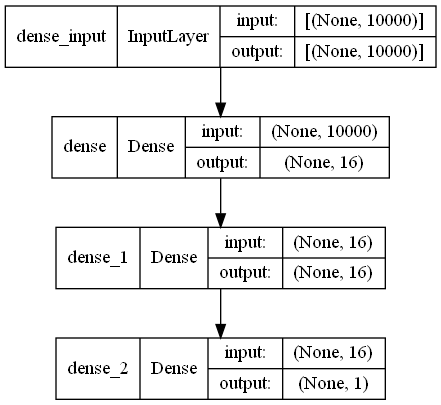

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(network, show_shapes = True, to_file = '电影评论二分类.png')

## 4、网络的编译

In [9]:
network.compile(optimizer = 'rmsprop', 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

## 5、留出验证集
将(25000,)的训练集划分为(15000, 1)的训练集和(10000, 1)的验证集  
这样可以防止测试集上的数据泄露

In [10]:
x_train = train_data[:15000]
y_train = train_labels[:15000]

x_val = train_data[15000:]
y_val = train_labels[15000:]

## 6、训练模型

In [11]:
history = network.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3450 - accuracy: 0.8567 - val_loss: 0.2751 - val_accuracy: 0.8888
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9231 - val_loss: 0.3179 - val_accuracy: 0.8795
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1564 - accuracy: 0.9416 - val_loss: 0.3148 - val_accuracy: 0.8856
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.9545 - val_loss: 0.3625 - val_accuracy: 0.8820
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9624 - val_loss: 0.4097 - val_accuracy: 0.8820
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9698 - val_loss: 0.4743 - val_accuracy: 0.8792
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9747 - val_loss: 0.5238 - val_accuracy: 0.8771
Epoch 

## 7、绘制训练损失和验证损失

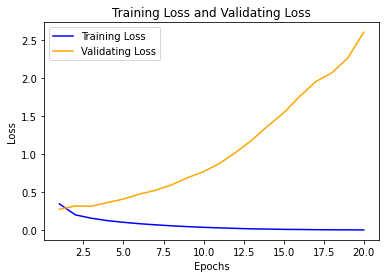

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b' ,label = "Training Loss")
plt.plot(epochs, val_loss, 'orange', label =  "Validating Loss")
plt.title("Training Loss and Validating Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## 8、绘制训练精度和验证精度

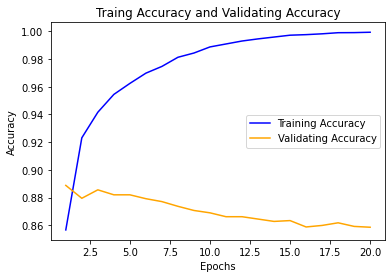

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'blue', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'orange', label = 'Validating Accuracy')
plt.title('Traing Accuracy and Validating Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 9、从头开始训练一个模型  

In [14]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))

network.compile(optimizer = 'rmsprop', 
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

network.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = network.evaluate(x_val, y_val)

Epoch 1/4
30/30 [==============================] - 1s 8ms/step - loss: 0.5045 - accuracy: 0.7864
Epoch 2/4
30/30 [==============================] - 0s 8ms/step - loss: 0.3000 - accuracy: 0.9029
Epoch 3/4
30/30 [==============================] - 0s 8ms/step - loss: 0.2198 - accuracy: 0.9282
Epoch 4/4
313/313 [==============================] - 0s 717us/step - loss: 0.2728 - accuracy: 0.8922


In [15]:
print(results)

[0.2727566063404083, 0.8921999931335449]


# 10、构建二分类问题的混淆矩阵
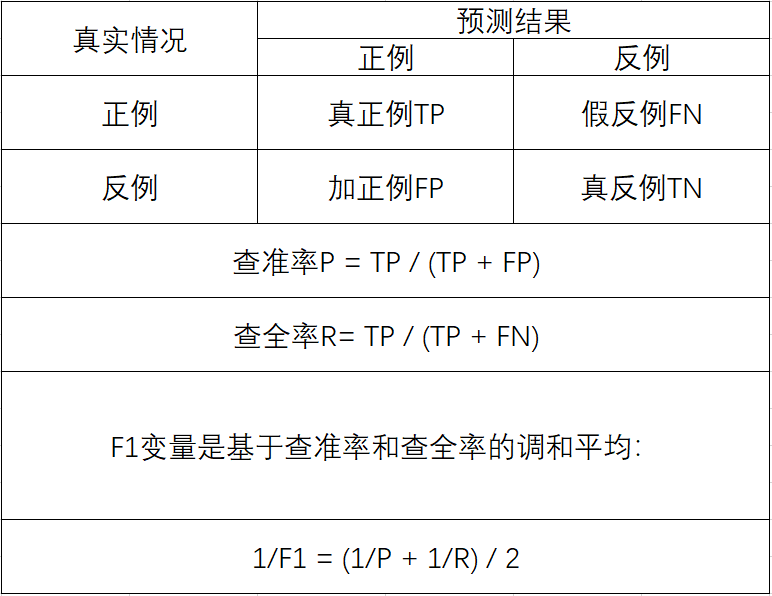

(1)查看模型在数据集上的预测  
由于从最后一层神经网络出来的概率表示是正评的概率，  
我们在这里将>0.5的概率看做正评，否则看做负评
将概率转换为0、1的整数之后，还要进行张量的变换

In [16]:
import numpy as np

prediction = network.predict(test_data)
print(prediction.shape) #shape = (25000, 1)

prediction = [(int) ((p[0] + 0.5)/ 1) for p in prediction]
print(len(prediction)) #len = 25000

prediction = np.asarray(prediction).astype('float32')
print(prediction.shape)

(25000, 1)
25000
(25000,)


In [20]:
prediction

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [21]:
test_labels

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [25]:
print(prediction.shape, test_labels.shape)

(25000,) (25000,)


In [24]:
test_labels = np.asarray(test_labels).astype('float32')

In [29]:
import pandas as pd

pd.crosstab(test_labels, prediction, rownames = ['labels'], colnames = ['predictions'])

predictions,0.0,1.0
labels,,
0.0,10987,1513
1.0,1404,11096


In [27]:
?pd.crosstab

利用sklearn中的classification_report来查看对应的准确率、召回率、F1-score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, prediction))